<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 190.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 177.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 153.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 158.2 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
#Generate missing value report
missing_data = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage (%)': (df.isna().mean()*100).round(2)
})

#filter to only show columns with missing values
missing_data = missing_data[missing_data['Missing Values']>0]

#sort by percentage descending
missing_data = missing_data.sort_values('Percentage (%)',ascending=False)
print("Missing Values Report:")
print(missing_data)

Missing Values Report:
                            Missing Values  Percentage (%)
AINextMuch less integrated           64289           98.25
AINextLess integrated                63082           96.40
AINextNo change                      52939           80.90
AINextMuch more integrated           51999           79.46
EmbeddedAdmired                      48704           74.43
...                                    ...             ...
YearsCode                             5568            8.51
NEWSOSites                            5151            7.87
LearnCode                             4949            7.56
EdLevel                               4653            7.11
AISelect                              4530            6.92

[109 rows x 2 columns]


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



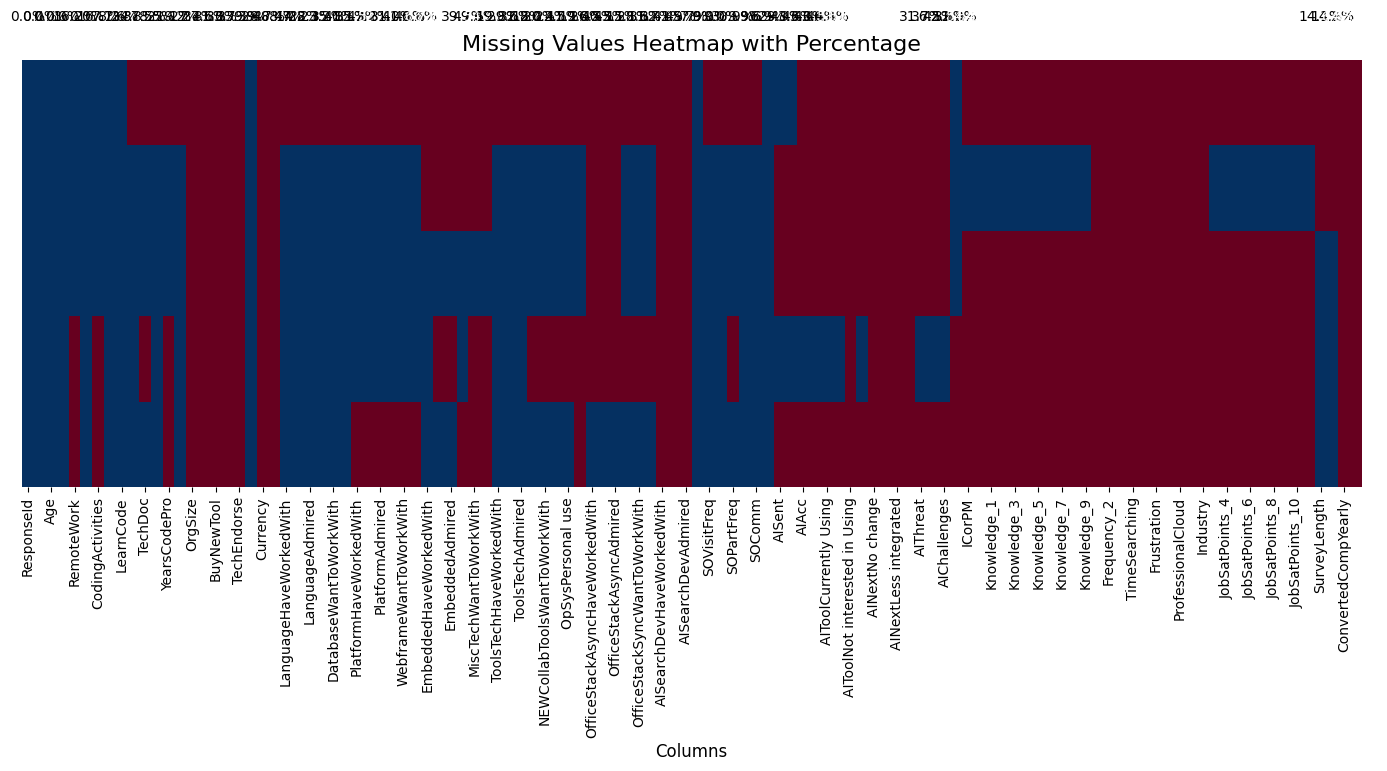

In [6]:
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df.isnull().head(), 
                cbar=False, 
                yticklabels=False,
                cmap='RdBu_r')  # Blue=present, Red=missing

# Add percentage annotations
for i, col in enumerate(df.columns):
    missing_pct = df[col].isnull().mean() * 100
    ax.text(i + 0.5, -0.5, f'{missing_pct:.1f}%', 
            ha='center', va='center', 
            color='black' if missing_pct < 50 else 'white')

plt.title('Missing Values Heatmap with Percentage', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [12]:
#missing values from employment column
#missing_emp = df['Employment'].isnull().sum()
#print(missing_emp)
missing_learncode = df['LearnCode'].isnull().sum()
print(missing_learncode)

4949


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [14]:
#column_name = df['LearnCode']
most_frequent_value = df['LearnCode'].mode()[0]
print(f"Most frequent value in '{column_name}' column:", most_frequent_value)

Most frequent value in '0                                   Books / Physical media
1        Books / Physical media;Colleague;On the job tr...
2        Books / Physical media;Colleague;On the job tr...
3        Other online resources (e.g., videos, blogs, f...
4        Other online resources (e.g., videos, blogs, f...
                               ...                        
65432    On the job training;School (i.e., University, ...
65433                                                  NaN
65434    Other online resources (e.g., videos, blogs, f...
65435    On the job training;Other online resources (e....
65436                                                  NaN
Name: LearnCode, Length: 65437, dtype: object' column: Other online resources (e.g., videos, blogs, forum, online community)


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [15]:
df['LearnCode'].fillna(most_frequent_value,inplace=True)

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


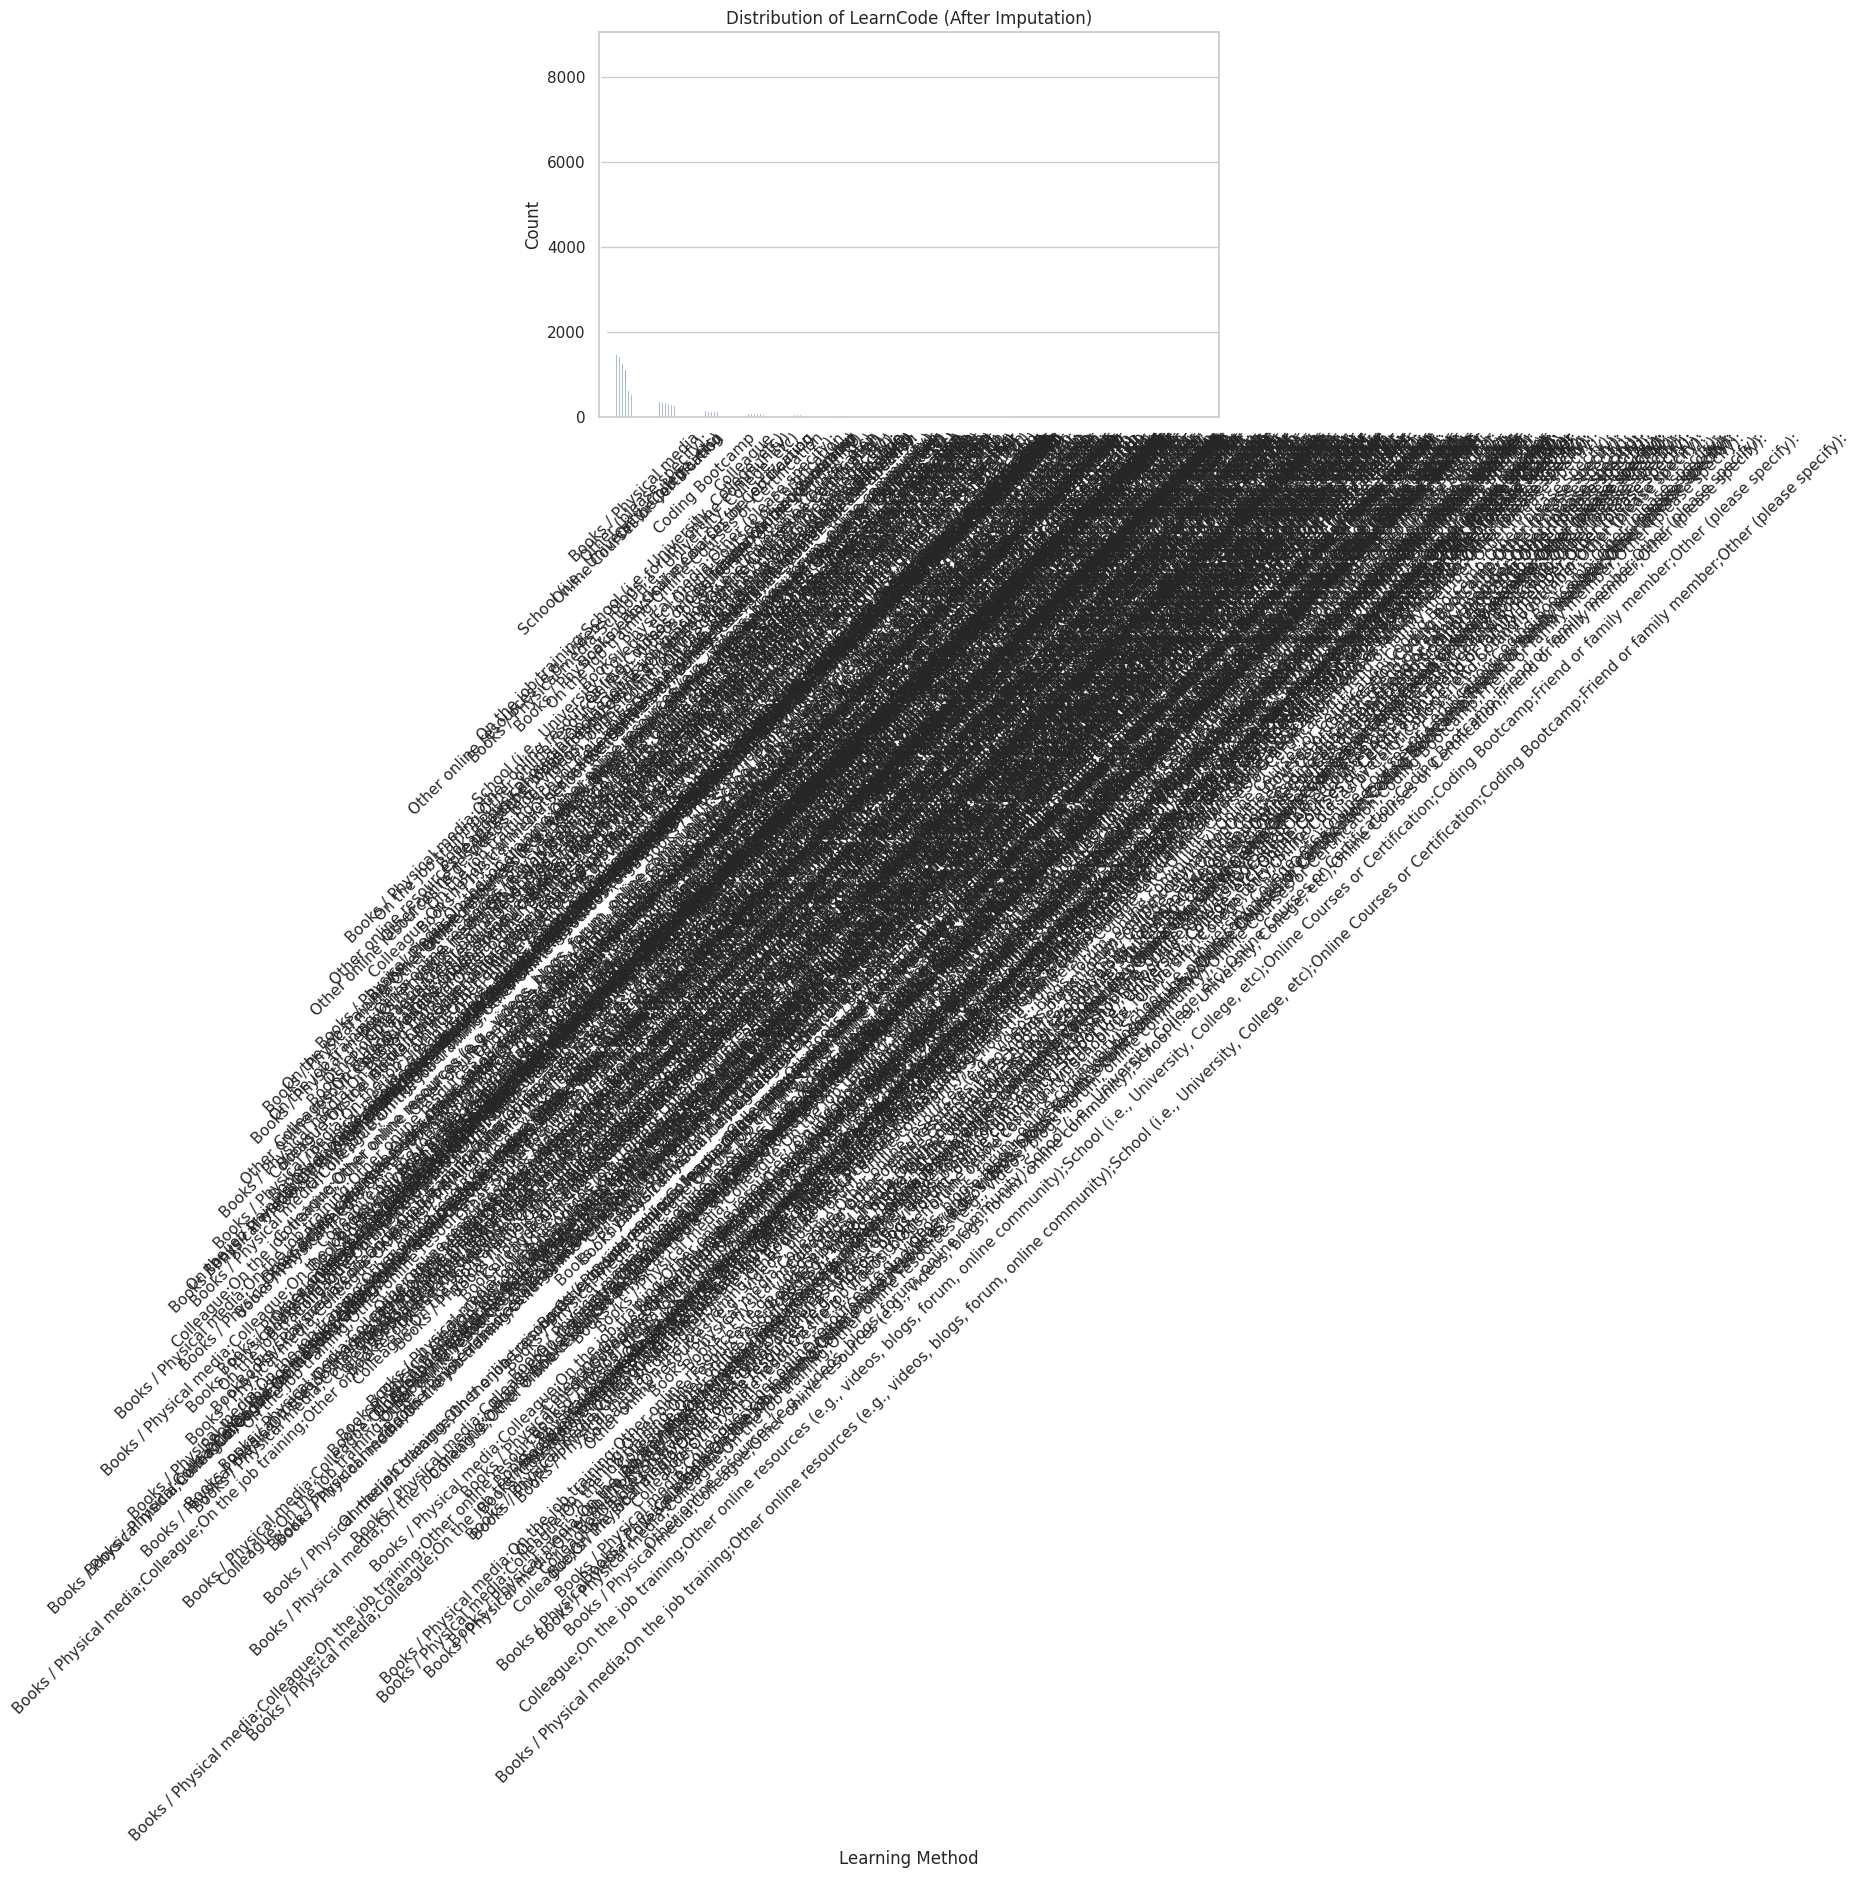

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='LearnCode', order=df['LearnCode'].value_counts().index)
plt.title('Distribution of LearnCode (After Imputation)')
plt.xlabel('Learning Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
